# Identification of Sagittarius stream members in Angular Momentum with Gaussian mixture techniques
## Peñarrubia & Petersen, 2021 (PP21)

Instructions for how to interface with the datasets described in the text.


In [1]:
import numpy as np

# plotting utilities and style
import matplotlib.pyplot as plt;import matplotlib as mpl;import matplotlib.cm as cm;import matplotlib.colors as colors
%matplotlib inline

cmap = mpl.cm.inferno
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.minor.visible'] = True

## Data

In [2]:
# EDR3 l b d ed rv erv pml epml pmb epmb pmlpmbcorr pmem type 

# read in the catalog
Sgr = np.genfromtxt('sgr_members.csv',delimiter=',',names=True,dtype=None)


In [3]:
# these are the EDR3 IDs we identify as part of the stream, given some membership threshold
# slightly different from the numbers in PP21 owing to the post-processing of the data.
print(Sgr['EDR3'].astype('int').size)

980


Text(0, 0.5, 'Galactic $b$')

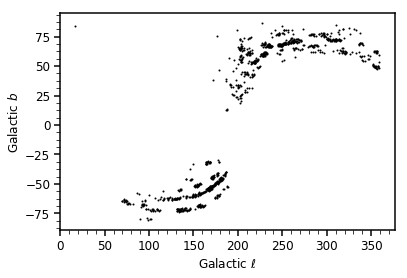

In [4]:
plt.scatter(Sgr['l'],Sgr['b'],color='black',s=1.)

plt.xlabel('Galactic $\ell$',size=12)
plt.ylabel('Galactic $b$',size=12)

## Posteriors

In [5]:
def read_posterior(infile,ncomps):
    """
    Inspect the posterior distributions. 
    Alternately, use the posterior distributions for sampling
    at even higher accuracy.
    """
    
    I = np.genfromtxt(infile)
    P = dict()
    
    for n in range(0,ncomps):
        P[n] = dict()
        
        # the total angular momentum of the component
        P[n]['L'] = np.power(10.,I[:,7*n])
        
        # the phi angle of the angular momentum vector (from the galactic centre)
        P[n]['phi'] = I[:,7*n+1]
        
        # the theta angle of the angular momentum vector (from the galactic centre)
        P[n]['th'] = np.arccos(I[:,7*n+2])
        
        # convert the above to Cartesian for ease
        P[n]['Lx'] = P[n]['L']*np.sin(P[n]['th'])*np.cos(P[n]['phi'])
        P[n]['Ly'] = P[n]['L']*np.sin(P[n]['th'])*np.sin(P[n]['phi'])
        P[n]['Lz'] = P[n]['L']*np.cos(P[n]['th'])
        
        # the x-direction hyperparameter
        P[n]['sx'] = np.sqrt(1./I[:,7*n+3])
        
        # the y-direction hyperparameter
        P[n]['sy'] = np.sqrt(1./I[:,7*n+4])
        
        # the z-direction hyperparameter
        P[n]['sz'] = np.sqrt(1./I[:,7*n+5])
        
        # the membership fraction in the component
        P[n]['frac'] = I[:,7*n+6]/np.sum(I[:,6::7],axis=1)
        
    # overall model realisation likelihood
    P['likelihood'] = I[:,7*n+7]
        
    return P
    
P = read_posterior('posterior_chains.txt',4)



In [6]:
# reproduce Table 1
print('{0:10s} {1:10s} {2:10s} {3:10s} {4:10s}'.format('Param.','#1 (Sgr)','#2 (GSE)','#3 (smooth)','#4 (OC)'))

params = ['frac','Lx','Ly','Lz','sx','sy','sz']
for p in params:
    print('{0:10s} '.format(p),end='')
    for c in [0,1,2,3]:
        print('{0:10.3f} '.format(np.nanmedian(P[c][p])),end='')
        # add uncertainties if you want!
        #print('+{0:<10.3f} '.format((np.abs(np.nanpercentile(P[c][p],86.)-np.nanpercentile(P[c][p],50.)))),end='')
        #print('-{0:<10.3f} '.format((np.abs(np.nanpercentile(P[c][p],14.)-np.nanpercentile(P[c][p],50.)))),end='')
    print('')


Param.     #1 (Sgr)   #2 (GSE)   #3 (smooth) #4 (OC)   
frac            0.315      0.239      0.438      0.008 
Lx            426.234     -0.736    144.232  -3905.246 
Ly          -4949.399     10.603   -278.703  -2322.699 
Lz          -1436.215      3.100    122.877  -4664.665 
sx            655.948     10.207   1755.111     12.788 
sy           1255.235     11.591   1926.290     12.131 
sz            658.675     10.201   1733.461     12.598 


Text(0, 0.5, 'L in comp #2')

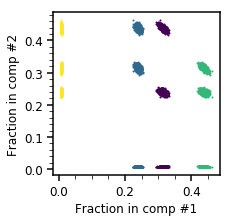

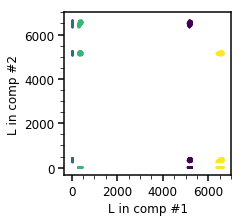

In [7]:
# check covariances between components
cname = ['Sgr','GSE','Halo','OC']

# membership fractions
plt.figure(figsize=(3,3))
for ic,c in enumerate([0,1,2,3]):
    for ic2,c2 in enumerate([0,1,2,3]):
        if ic==ic2: continue
        plt.scatter(P[c]['frac'][::5],P[c2]['frac'][::5],color=cm.viridis(ic/3.),s=1.,label=cname[ic])

plt.xlabel('Fraction in comp #1',size=12)
plt.ylabel('Fraction in comp #2',size=12)

# total angular momentum
plt.figure(figsize=(3,3))
for ic,c in enumerate([0,1,2,3]):
    for ic2,c2 in enumerate([0,1,2,3]):
        if ic==ic2: continue
        plt.scatter(P[c]['L'][::5],P[c2]['L'][::5],color=cm.viridis(ic/3.),s=1.,label=cname[ic])

plt.xlabel('L in comp #1',size=12)
plt.ylabel('L in comp #2',size=12)

# some covariances in membership fractions -- but very mild overall.


Text(0, 0.5, 'L in dimension #2')

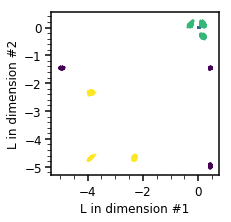

In [8]:
# check covariances for indicvidual components between values

cname = ['Sgr','GSE','Halo','OC']

plt.figure(figsize=(3,3))

for ic,c in enumerate([0,1,2,3]):
    plt.scatter(P[c]['Lx'][::5]/1000.,P[c]['Ly'][::5]/1000.,color=cm.viridis(ic/3.),s=1.,label=cname[ic])
    plt.scatter(P[c]['Lx'][::5]/1000.,P[c]['Lz'][::5]/1000.,color=cm.viridis(ic/3.),s=1.,label=cname[ic])
    plt.scatter(P[c]['Ly'][::5]/1000.,P[c]['Lz'][::5]/1000.,color=cm.viridis(ic/3.),s=1.,label=cname[ic])

plt.xlabel('L in dimension #1',size=12)
plt.ylabel('L in dimension #2',size=12)

# no obvious covariances!

#plt.legend()